### 操作文本数据。读取某软件的输出结果（文本形式），提取信息，并作图展示。也可将新的内容写回原来的文本文档。

#### with语句是上下文管理器（context manager），上下文管理器是一种支持__enter__和__exit__这两个方法的对象。__enter__方法不带参数，它在进入with语句块的时候被调用，返回值绑定到在as关键字之后的变量。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open('ObsNod.out','r') as f:
    raw_content = f.readlines()

raw_content

['\n',
 '                     Node(  349)                   Node(  677)                   Node( 1005)\n',
 '\n',
 '      time          hNew     theta    Temp          hNew     theta    Temp          hNew     theta    Temp    \n',
 '  .00000000E+00     -102.948   .1005   20.000       -102.948   .1005   20.000       -102.948   .1005   20.000\n',
 '        1.0000     -102.474   .1008   20.000       -102.948   .1005   20.000       -102.948   .1005   20.000\n',
 '        2.0000      -13.891   .3444   20.000       -102.948   .1005   20.000       -102.948   .1005   20.000\n',
 '        3.0000       -7.179   .3895   20.000       -102.948   .1005   20.000       -102.948   .1005   20.000\n',
 '        4.0000       -5.988   .3956   20.000       -102.540   .1008   20.000       -102.948   .1005   20.000\n',
 '        5.0000       -5.612   .3973   20.000        -32.178   .2295   20.000       -102.948   .1005   20.000\n',
 '        6.0000       -5.442   .3981   20.000        -12.999   .3509   20.000 

In [3]:
content = raw_content.copy()
for i in range(len(content)):
    content[i] = content[i].split()   #将文本的每一个item按空格进行分开，每一行是该行所有的item组成的列表，有多少行就有多少个列表                    

In [32]:
valid_content = content[4:-1]   # 提取出需要分析的数据，看好位置提取
for i in range(len(valid_content)):
    valid_content[i] = np.float32(np.array(valid_content[i]))  # 将每一个list转换成数组，并且将str类型的数据转换成float类型数据
valid_content = np.array(valid_content) # 因为valid_content本身是列表，所以这里再做一个数组变换，这样要提取的数据就存到了最终的数组里了

#### 提取三个点 的h随时间的变化

In [47]:
time = valid_content[:,0]

h_up = valid_content[:,1]
h_mid = valid_content[:,4]
h_low = valid_content[:,7]

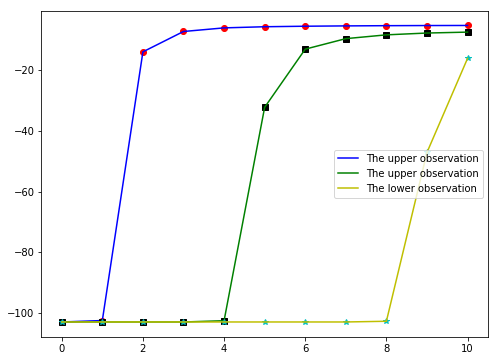

In [57]:
plt.figure(figsize=(8,6))
plt.plot(time,h_up,'ro')
plt.plot(time,h_up,'b',label='The upper observation')

plt.plot(time,h_mid,'ks')
plt.plot(time,h_mid,'g',label='The upper observation')

plt.plot(time,h_low,'c*')
plt.plot(time,h_low,'y',label='The lower observation')
plt.legend(loc='center right')

### 向文本文档中写数据

In [14]:
content[0] = 'Python is a convenient for text processing'
content_add = 'Python is popular because it is easy to study.'
content.append(content_add)  #这里获得的是一连串的列表，这个不能写进文本，需要转换成一连串的字符串（类似raw_content）才可以写进文本

In [38]:
content_write = []   # 准备一个空列表，用于接收一连串的字符串，一个字符串代表即将写入文本的一行
for i in range(len(content)):
    str_ = ' '.join(content[i]) + '\n'  #使用join进行字符串拼接效率比较高，字符串末尾的换行符不能少
    content_write.append(str_)

In [39]:
content_write

['P y t h o n   i s   a   c o n v e n i e n t   f o r   t e x t   p r o c e s s i n g\n',
 'Node( 349) Node( 677) Node( 1005)\n',
 '\n',
 'time hNew theta Temp hNew theta Temp hNew theta Temp\n',
 '.00000000E+00 -102.948 .1005 20.000 -102.948 .1005 20.000 -102.948 .1005 20.000\n',
 '1.0000 -102.474 .1008 20.000 -102.948 .1005 20.000 -102.948 .1005 20.000\n',
 '2.0000 -13.891 .3444 20.000 -102.948 .1005 20.000 -102.948 .1005 20.000\n',
 '3.0000 -7.179 .3895 20.000 -102.948 .1005 20.000 -102.948 .1005 20.000\n',
 '4.0000 -5.988 .3956 20.000 -102.540 .1008 20.000 -102.948 .1005 20.000\n',
 '5.0000 -5.612 .3973 20.000 -32.178 .2295 20.000 -102.948 .1005 20.000\n',
 '6.0000 -5.442 .3981 20.000 -12.999 .3509 20.000 -102.948 .1005 20.000\n',
 '7.0000 -5.335 .3985 20.000 -9.536 .3752 20.000 -102.948 .1005 20.000\n',
 '8.0000 -5.263 .3988 20.000 -8.285 .3832 20.000 -102.712 .1007 20.000\n',
 '9.0000 -5.217 .3990 20.000 -7.687 .3867 20.000 -47.054 .1761 20.000\n',
 '10.0000 -5.192 .3991 20.000 -

In [40]:
content_write[0] = content[0] + '\n'  #对新加的内容做进一步调整
content_write[-1] = content[-1] + '\n'

In [41]:
content_write

['Python is a convenient for text processing\n',
 'Node( 349) Node( 677) Node( 1005)\n',
 '\n',
 'time hNew theta Temp hNew theta Temp hNew theta Temp\n',
 '.00000000E+00 -102.948 .1005 20.000 -102.948 .1005 20.000 -102.948 .1005 20.000\n',
 '1.0000 -102.474 .1008 20.000 -102.948 .1005 20.000 -102.948 .1005 20.000\n',
 '2.0000 -13.891 .3444 20.000 -102.948 .1005 20.000 -102.948 .1005 20.000\n',
 '3.0000 -7.179 .3895 20.000 -102.948 .1005 20.000 -102.948 .1005 20.000\n',
 '4.0000 -5.988 .3956 20.000 -102.540 .1008 20.000 -102.948 .1005 20.000\n',
 '5.0000 -5.612 .3973 20.000 -32.178 .2295 20.000 -102.948 .1005 20.000\n',
 '6.0000 -5.442 .3981 20.000 -12.999 .3509 20.000 -102.948 .1005 20.000\n',
 '7.0000 -5.335 .3985 20.000 -9.536 .3752 20.000 -102.948 .1005 20.000\n',
 '8.0000 -5.263 .3988 20.000 -8.285 .3832 20.000 -102.712 .1007 20.000\n',
 '9.0000 -5.217 .3990 20.000 -7.687 .3867 20.000 -47.054 .1761 20.000\n',
 '10.0000 -5.192 .3991 20.000 -7.385 .3884 20.000 -16.043 .3285 20.000\n

In [42]:
with open('modified_content.txt','w') as f:
    f.writelines(content_write)